<a href="https://colab.research.google.com/github/Negm-elgaan/doom/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import *

In [13]:

df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


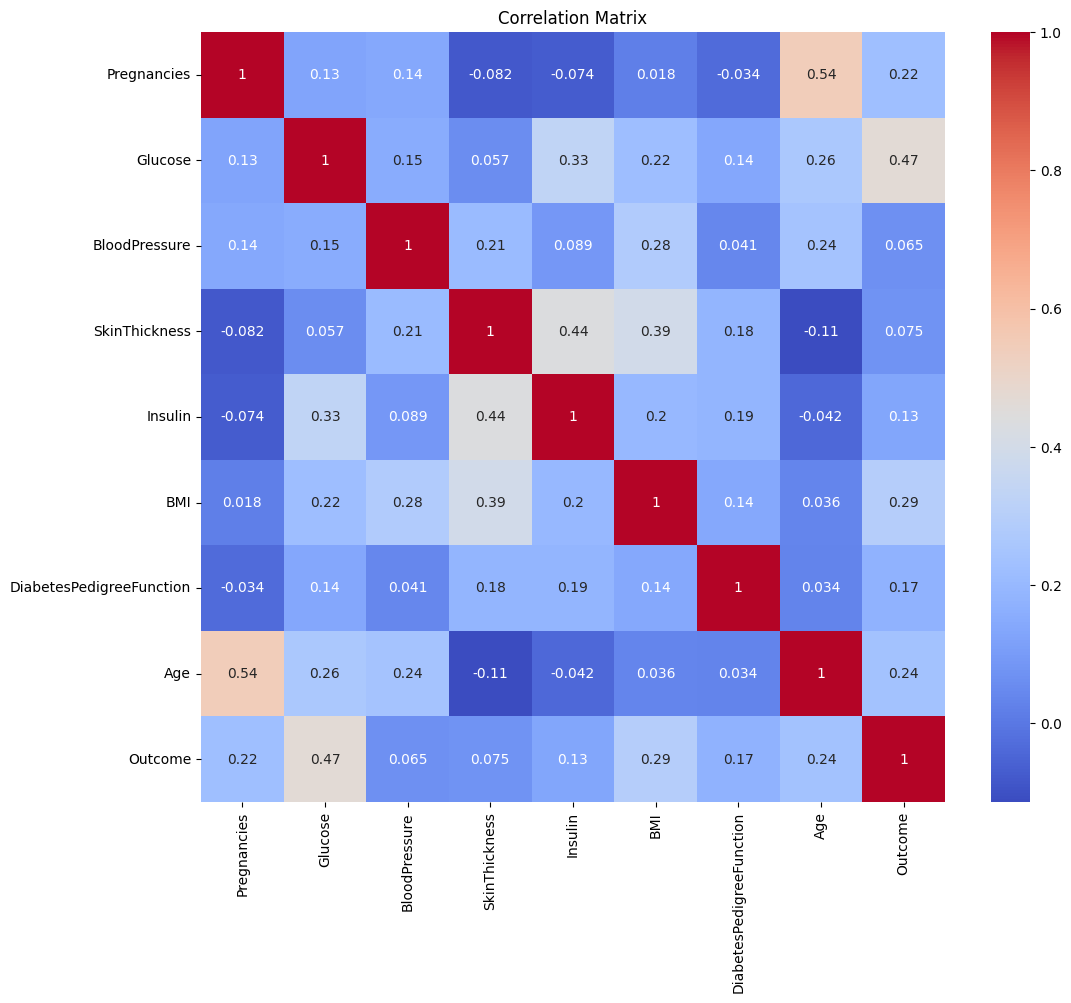

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

selector = SelectKBest(score_func=f_classif,k =4)
X_new = selector.fit_transform(X,y)

In [24]:
# Assuming you have a SelectKBest object name 'selector' amd it's already fitted
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names =df.columns[selected_feature_indices]
selected_feature_names

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

In [26]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_new)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [28]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [32]:
# calculatethe confusion matricies for training and testing
cm_train = confusion_matrix(y_train,y_train_pred)
cm_test = confusion_matrix(y_test,y_test_pred)


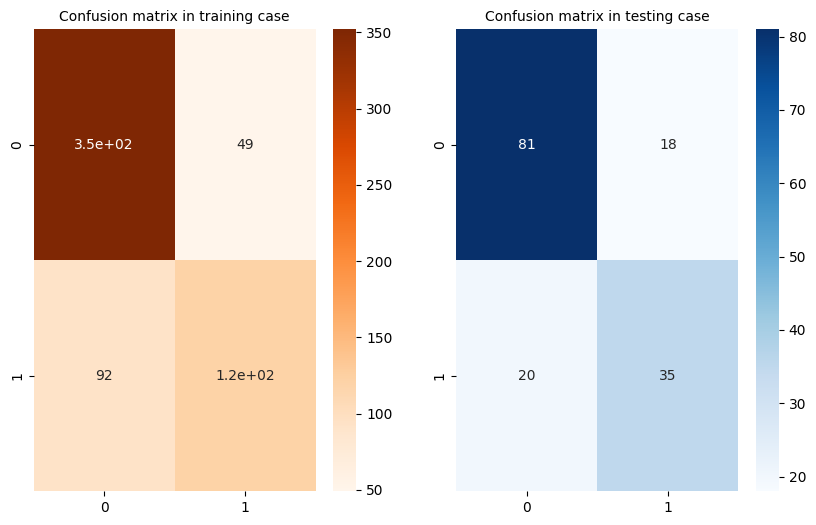

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(cm_train,annot=True,cmap='Oranges')
plt.title('Confusion matrix in training case',fontsize=10)

plt.subplot(1,2,2)
sns.heatmap(cm_test,annot=True,cmap='Blues')
plt.title('Confusion matrix in testing case',fontsize=10)
plt.show()


In [35]:
accuracy_score_train = accuracy_score(y_train,y_train_pred)
accuracy_score_test = accuracy_score(y_test,y_test_pred)
accuracy_score_train


0.7703583061889251